**`⚠`** <font size="2">**WARNING:** Some of the code lines in this notebook may be cropped out due to display limitations. To view the entire code properly, please click on this [link](https://nbviewer.org/github/nataliakoliou/NLP-Various-Implementations/blob/main/Assignment-4/nlp-4.ipynb) to open the notebook in nbviewer or this [link](https://colab.research.google.com/github/nataliakoliou/NLP-Various-Implementations/blob/main/Assignment-4/nlp-4.ipynb) to open the notebook in Google Colab.</font>

# **NLP-Various Implementations | Transition-based vs Graph-based Dependency Parser**

**Overview:** In this part of the project, I evaluated different dependency parsers. First, I worked on a transition-based parser inspired by Chen & Manning and assessed its performance using existing hyperparameters. Next, I made several modifications to the code. I experimented with randomly initialized word embeddings instead of pretrained embeddings. I also explored using only word features and pretrained word embeddings, and I added an extra hidden layer with ReLU activation. Additionally, I tested the cubic activation function proposed in the original paper. Then, I wroked on a graph-based parser inspired by Kiperwasser & Goldberg. I started with a single layer bidirectional LSTM encoder and evaluated its performance. Further modifications included replacing learned word embeddings with pretrained Glove-6B-100d embeddings and changing the activation function in the MLPs' hidden layer from tanh to ReLU. Finally, I replaced the BiLSTM encoder with a pretrained BERT language model. Throughout these evaluations, I calculated the Unlabeled Attachment Score (UAS) and sometimes the Labeled Attachment Score (LAS) on the test set. These comparisons provided insights into the impact of different techniques and architectural choices on dependency parsing accuracy.

## **1. Import all the necessary modules**

**Briefly:** `os` module enables interaction with the operating system, facilitating file and directory operations, whereas `google.colab.drive` module provides tools for connecting and accessing Google Drive within the Google Colaboratory environment.

In [ ]:
import os
from google.colab import drive

## **2. Transition-based Dependency Parser**

A transition-based dependency parser is a natural language processing algorithm that analyzes the grammatical structure of a sentence by identifying the relationships between words. The algorithm I worked on, implements a transition-based dependency parser based on the work of Chen & Manning (2014). It uses a neural network, implemented with PyTorch, to determine if there are dependency connections between word pairs. This parser specifically focuses on detecting unlabeled dependencies, without considering the specific types of relationships (e.g., subject, object). By considering word and part-of-speech tag features, it decides on actions like creating left or right arcs or shifting words. Performance is evaluated using metrics such as Unlabeled Attachment Score (UAS), which measures the accuracy of predicted dependencies.

### **2.1: UAS Analysis with Default Hyperparameters**

The model achieved an Unlabeled Attachment Score (UAS) of 89.22 on the test dataset. This indicates that the model performed well in accurately predicting the dependency relationships between words in the test sentences.

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/A1')

Mounted at /content/drive


In [ ]:
!python run.py

INITIALIZING
Loading data...
took 5.14 seconds
Building parser...
took 1.60 seconds
Loading pretrained embeddings...
took 4.50 seconds
Vectorizing data...
took 1.25 seconds
Preprocessing training data...
took 45.06 seconds
took 0.09 seconds

TRAINING
Epoch 1 out of 10
100% 1848/1848 [02:01<00:00, 15.20it/s]
Average Train Loss: 0.18284118215823586
Evaluating on dev set
1445850it [00:00, 48639581.95it/s]
- dev UAS: 83.66
New best dev UAS! Saving model.

Epoch 2 out of 10
100% 1848/1848 [01:58<00:00, 15.57it/s]
Average Train Loss: 0.11497768140458442
Evaluating on dev set
1445850it [00:00, 25215527.81it/s]
- dev UAS: 86.34
New best dev UAS! Saving model.

Epoch 3 out of 10
100% 1848/1848 [01:57<00:00, 15.67it/s]
Average Train Loss: 0.10055593795896996
Evaluating on dev set
1445850it [00:00, 47658350.27it/s]
- dev UAS: 87.14
New best dev UAS! Saving model.

Epoch 4 out of 10
100% 1848/1848 [01:57<00:00, 15.73it/s]
Average Train Loss: 0.09199080914178323
Evaluating on dev set
1445850it [00:

### **2.2: UAS Analysis with randomly initialized Word Embeddings**

The model achieved an Unlabeled Attachment Score (UAS) of 88.44 on the test dataset, which is slightly lower compared to the UAS obtained in Section 2.1. This still indicates though that the model performed well in accurately predicting the dependency relationships between words in the test sentences.

**Code Modifications:**

`1)` **parser_utils.py**: I removed the embedding_file variable from the Config class.

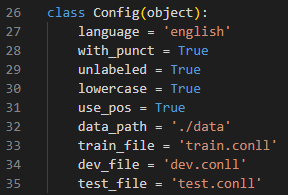

`2)` **parser_utils.py**: I removed the section responsible for loading the pretrained embeddings and replaced it with a new snippet that initializes the embeddings_matrix with random embeddings. This change ensures that the embeddings are not dependent on pretrained vectors and allows them to be learned during the training process.

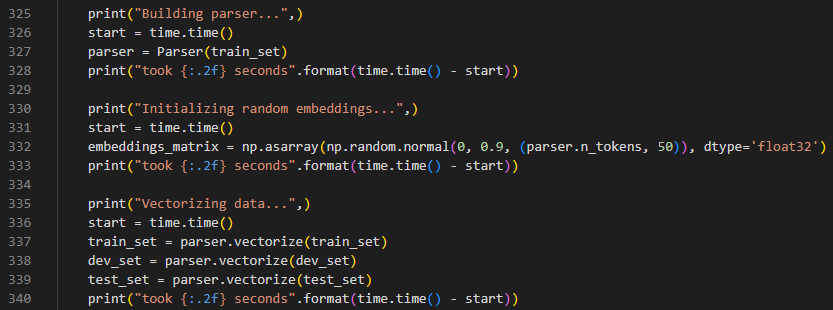

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/A2')

Mounted at /content/drive


In [ ]:
!python run.py

INITIALIZING
Loading data...
took 4.49 seconds
Building parser...
took 2.01 seconds
Initializing random embeddings...
took 0.10 seconds
Vectorizing data...
took 1.45 seconds
Preprocessing training data...
took 44.51 seconds
took 0.09 seconds

TRAINING
Epoch 1 out of 10
100% 1848/1848 [01:59<00:00, 15.45it/s]
Average Train Loss: 0.19816603879666045
Evaluating on dev set
1445850it [00:00, 44595940.98it/s]
- dev UAS: 82.24
New best dev UAS! Saving model.

Epoch 2 out of 10
100% 1848/1848 [02:02<00:00, 15.09it/s]
Average Train Loss: 0.1264008536967106
Evaluating on dev set
1445850it [00:00, 47826358.55it/s]
- dev UAS: 84.84
New best dev UAS! Saving model.

Epoch 3 out of 10
100% 1848/1848 [01:57<00:00, 15.67it/s]
Average Train Loss: 0.11103719363222907
Evaluating on dev set
1445850it [00:00, 45931140.70it/s]
- dev UAS: 85.84
New best dev UAS! Saving model.

Epoch 4 out of 10
100% 1848/1848 [02:01<00:00, 15.22it/s]
Average Train Loss: 0.10225191070331317
Evaluating on dev set
1445850it [00:

### **2.3: UAS Analysis with Word Features Only**

The model achieved an Unlabeled Attachment Score (UAS) of 86.18 on the test dataset, which is quite lower compared to the UAS obtained in Section 2.1. This still indicates though that the model performed well in accurately predicting the dependency relationships between words in the test sentences.

**Code Modifications:**

`1)` **parser_utils.py**: I set the use_pos variable from the Config class to False.

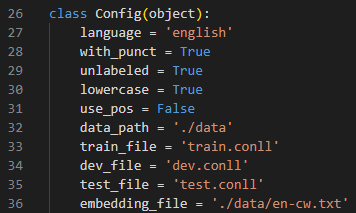

`2)` **parser_utils.py**: I created a get_n_features method in the Parser class that returns the number of features used in the transition-based dependency parsing. This method can be used to retrieve the total number of features utilized by the parser.

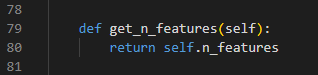

`3)` **run.py**: I used the get_n_features() method of the parser object to retrieve the number of features used by the parser. The obtained value is then passed as an argument to initialize the ParserModel object named model. The reason for using this method is that the ParserModel object has a parameter n_features which is set to 36 by default. However, since we are not using part-of-speech (pos) features, which account for 18 features, those features are removed, and the get_n_features() method provides the updated number of features to ensure proper initialization of the ParserModel.

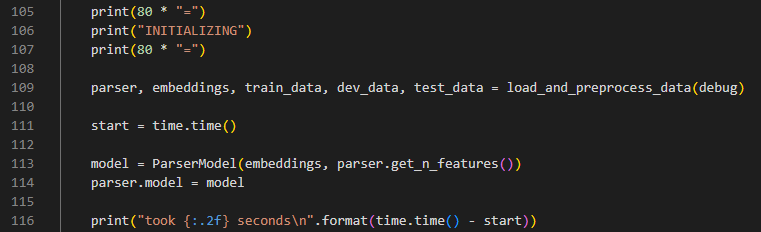

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/A3')

Mounted at /content/drive


In [ ]:
!python run.py

/content/drive/MyDrive/nlp/A3/parser_transitions.py:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if transition is 'S': self.stack.append(self.buffer.pop(0))
/content/drive/MyDrive/nlp/A3/parser_transitions.py:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif transition is 'LA': self.dependencies.append((self.stack[-1], self.stack.pop(-2)))
INITIALIZING
Loading data...
took 4.41 seconds
Building parser...
took 1.56 seconds
Loading pretrained embeddings...
took 3.52 seconds
Vectorizing data...
took 1.31 seconds
Preprocessing training data...
took 39.97 seconds
took 0.09 seconds

TRAINING
Epoch 1 out of 10
100% 1848/1848 [01:22<00:00, 22.41it/s]
Average Train Loss: 0.22756049948143753
Evaluating on dev set
1445850it [00:00, 47811276.01it/s]
- dev UAS: 78.64
New best dev UAS! Saving model.

Epoch 2 out of 10
100% 1848/1848 [01:22<00:00, 22.48it/s]
Average Train Loss: 0.13700212036698928
Evaluating on dev set
1445850it [00:00, 25349283.49it/s]
- dev UAS: 82.3

### **2.4: UAS Analysis with an additional Hidden Layer**

The model achieved an Unlabeled Attachment Score (UAS) of 89.16 on the test dataset, which is only 0.6 points below the UAS obtained in Section 2.1. This indicates that the model performed well in accurately predicting the dependency relationships between words in the test sentences.

**Code Modifications:**

`1)` **parser_model.py**: First, I introduced two new parameters, hidden1_size and hidden2_size, which are different from the initial single hidden size of 200. These parameters control the sizes of the first and second hidden layers in the model. Next, I modified the layer structure accordingly. Now, the embed_to_hidden layer takes the input from the embeddings and connects it to the first hidden layer (hidden1_size). Additionally, I introduced a new hidden_to_hidden layer that connects the first hidden layer to the second hidden layer (hidden2_size). This additional layer adds an extra level of flexibility and complexity to the model's architecture. Furthermore, I changed the hidden_to_logits layer to accept input from the second hidden layer (hidden2_size). This modification aligns with the updated layer structure and ensures that the model can generate appropriate logits based on the information from the second hidden layer.

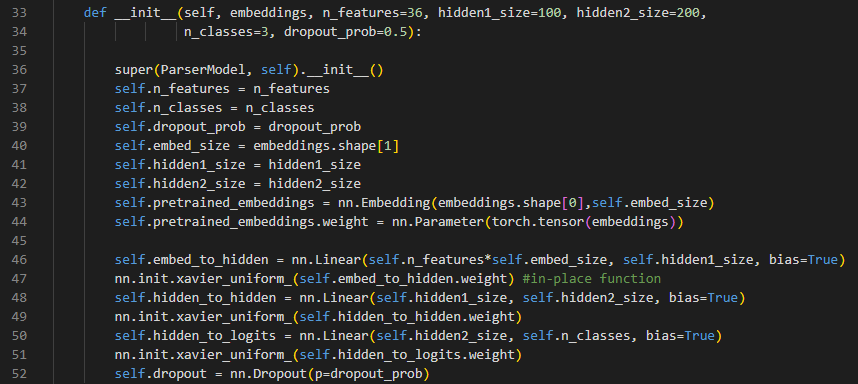

`2)` **parser_model.py**: I renamed the variable h to h1 to accurately represent its role as the output of the first hidden layer. I then introduced a new hidden layer, hidden_to_hidden, and applied the ReLU activation function to the output of this layer. The hidden_to_hidden layer connects the first hidden layer (h1) to the second hidden layer (h2), resulting in a deeper layer structure. I finally modified the calculation of logits by passing the output of the second hidden layer (h2) through the hidden_to_logits layer. These changes in the forward method reflect the updated layer structure and activation functions applied between the hidden layers

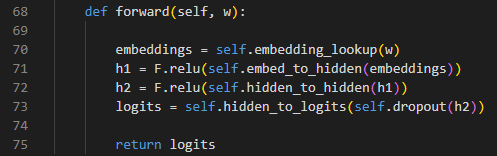

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/A4')

Mounted at /content/drive


In [ ]:
!python run.py

/content/drive/MyDrive/nlp/A4/parser_transitions.py:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if transition is 'S': self.stack.append(self.buffer.pop(0))
/content/drive/MyDrive/nlp/A4/parser_transitions.py:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif transition is 'LA': self.dependencies.append((self.stack[-1], self.stack.pop(-2)))
INITIALIZING
Loading data...
took 5.23 seconds
Building parser...
took 1.19 seconds
Loading pretrained embeddings...
took 4.90 seconds
Vectorizing data...
took 1.14 seconds
Preprocessing training data...
took 45.22 seconds
took 0.09 seconds

TRAINING
Epoch 1 out of 10
100% 1848/1848 [01:42<00:00, 18.10it/s]
Average Train Loss: 0.16353242787899394
Evaluating on dev set
1445850it [00:00, 21104201.25it/s]
- dev UAS: 85.00
New best dev UAS! Saving model.

Epoch 2 out of 10
100% 1848/1848 [01:54<00:00, 16.08it/s]
Average Train Loss: 0.09555926365229539
Evaluating on dev set
1445850it [00:00, 48821666.14it/s]
- dev UAS: 86.1

### **2.5: UAS Analysis with Cubic Activation Function**

The model achieved an Unlabeled Attachment Score (UAS) of 87.72 on the test dataset, which is a bit lower than the UAS obtained in Section 2.1. This still indicates though that the model performed well in accurately predicting the dependency relationships between words in the test sentences.

**Code Modifications:**

`1)` **parser_utils.py**: I imported torch.nn in order to access the nn.Module class. This allowed me to inherit from nn.Module and define my own custom CubicActivation class.

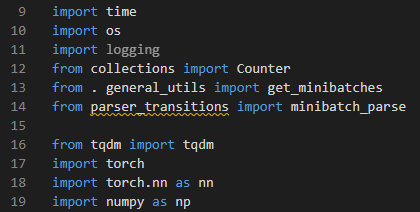

`2)` **parser_utils.py**: I created a custom class named CubicActivation that inherits from nn.Module. This class serves as a replacement for the ReLU activation function in the network architecture. In the forward method of the CubicActivation class, I implemented the cubic activation function by raising the input x to the power of 3 using the torch.pow function. This allows me to apply the cubic activation function to the respective layers of the model during forward propagation.

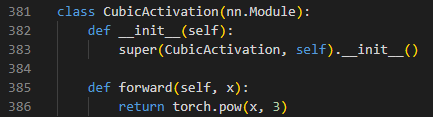

`3)` **parser_model.py**: I imported the CubicActivation class from the utils.parser_utils module. This allows me to incorporate the cubic activation function into the layer structure of the parser model, providing an alternative activation function to ReLU.

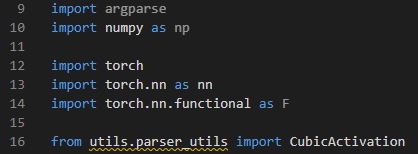

`4)` **parser_model.py**: I created an instance of the CubicActivation class and assigned it to the variable cubic_activation. This instance will be used as a layer in my ParserModel for applying the cubic activation function.

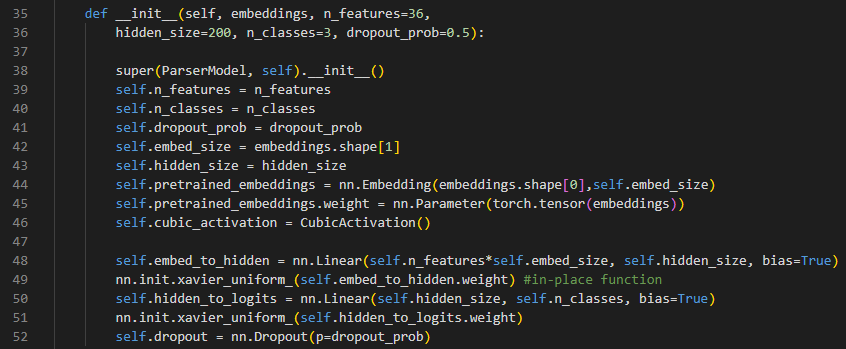

`5)` **parser_model.py**: I replaced the ReLU activation function with the cubic activation function. This modification applies the cubic activation to the output of the embed_to_hidden layer before proceeding with the remaining layers.

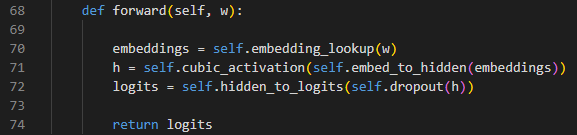

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/A5')

Mounted at /content/drive


In [ ]:
!python run.py

/content/drive/MyDrive/nlp/A5/parser_transitions.py:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if transition is 'S': self.stack.append(self.buffer.pop(0))
/content/drive/MyDrive/nlp/A5/parser_transitions.py:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif transition is 'LA': self.dependencies.append((self.stack[-1], self.stack.pop(-2)))
INITIALIZING
Loading data...
took 3.05 seconds
Building parser...
took 1.06 seconds
Loading pretrained embeddings...
took 3.70 seconds
Vectorizing data...
took 1.28 seconds
Preprocessing training data...
took 47.28 seconds
took 0.13 seconds

TRAINING
Epoch 1 out of 10
100% 1848/1848 [02:29<00:00, 12.34it/s]
Average Train Loss: 0.29868716776000087
Evaluating on dev set
1445850it [00:00, 42533153.12it/s]
- dev UAS: 81.26
New best dev UAS! Saving model.

Epoch 2 out of 10
100% 1848/1848 [02:12<00:00, 13.92it/s]
Average Train Loss: 0.144056926142763
Evaluating on dev set
1445850it [00:00, 43484711.91it/s]
- dev UAS: 84.24


## **3. Graph-based Dependency Parser**

A graph-based dependency parser is a natural language processing algorithm that analyzes the grammatical structure of a sentence by modeling it as a directed graph. The algorithm I worked on, implements a graph-based dependency parser based on the work of Kiperwasser and Goldberg (2016). The input consists of a sentence with a special &lt;ROOT&gt; token added at the beginning, along with word and part-of-speech tag embeddings. These embeddings are concatenated and processed by a bidirectional LSTM encoder. The BiLSTM output is then fed through two multi-layer perceptrons, one to score the dependency relationships and the other to classify them into specific dependency categories. The predictions are used to construct the final dependency tree. The parser's performance is evaluated using metrics like Unlabeled Attachment Score (UAS), and the provided training, validation, and test data can be used for evaluation and comparison with other parsers.

### **3.1: UAS/LAS Analysis with Default Hyperparameters**

The model achieved an Unlabeled Attachment Score (UAS) of 93.87 and a Labeld Attachment Score (LAS) of 92.25 on the test dataset. This indicates that the model performed well in accurately predicting both unlabeled and labeled dependency relationships between words in the test sentences. The performance of this graph-based dependency parser, compared to the transition-based dependency parser in Section 2.1, shows a significant improvement in capturing syntactic dependencies. The transition-based parser achieved a UAS of 89.22, while the graph-based parser achieved an even higher UAS of 93.87. This indicates that the graph-based approach is more effective in accurately predicting unlabeled dependency relationships between words in the test sentences.

> Compared to the transition-based approach, which typically operates in a step-by-step transition process, the graph-based approach can consider the entire sentence's context simultaneously. This global perspective allows the graph-based parser to capture long-range dependencies and better understand the interdependencies between words.

In [5]:
import os
from google.colab import drive

In [6]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/B1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python main.py

2023-06-16 10:48:29,310 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': None, 'ext_emb': None, 'seed': 1234, 'epochs': 3, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 2, 'no_cuda': False, 'log_interval': 2000, 'do_eval': False, 'experiment_dir': './results/ds=ptb_epochs=3_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_16_2023'}
2023-06-16 10:48:32,795 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
2023-06-16 10:48:50,658 - INFO - -----------+-----------+-----------+-----------+-----------
2023-06-16 10:48:50,669 - INFO - Train epoch: 1
2023-06-16 10:48:51,726 - INFO - [0/39832 (0%)]
2023-06-16 10:50:38,721 - INFO - [2000/39832 (5%)]
2023-06-16 10:52:21,148 - INFO - [4000/39832 (10%)]
2023-06-16 10:54:02,065 - INFO - [6000/39832 (1

### **3.2: UAS/LAS Analysis with Pre-trained Glove Embeddings**

The model achieved an Unlabeled Attachment Score (UAS) of 93.97 and a Labeld Attachment Score (LAS) of 92.41 on the test dataset, both of which are higher than the values obtained in Section 3.1. This indicates that the model performed quite better in accurately predicting unlabeled and labeled dependency relationships between words in the test sentences.

The performance of this graph-based dependency parser, compared to the transition-based dependency parser in Section 2.1, shows a significant improvement in capturing syntactic dependencies. The transition-based parser achieved a UAS of 89.22, while once again the graph-based parser achieved a higher UAS of 93.97. This indicates that the graph-based approach is more effective in accurately predicting unlabeled dependency relationships between words in the test sentences.

**Code Modifications:**

`>` **main.py**: I modified the ext_emb argument in the main function to point to the Glove embeddings file located at /content/drive/MyDrive/nlp/glove.6B.100d.txt. This allows the model to use pre-trained Glove word embeddings instead of learning the embeddings from scratch.

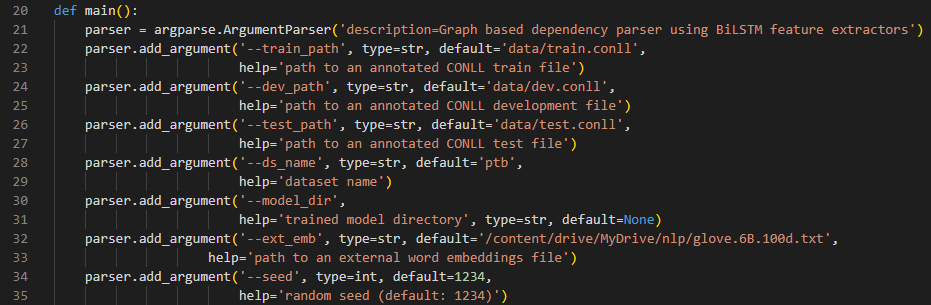

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/B2')

Mounted at /content/drive


In [ ]:
!python main.py

2023-06-16 15:31:48,298 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': None, 'ext_emb': '/content/drive/MyDrive/nlp/glove.6B.100d.txt', 'seed': 1234, 'epochs': 3, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 2, 'no_cuda': False, 'log_interval': 2000, 'do_eval': False, 'experiment_dir': './results/ds=ptb_epochs=3_lr=0.001_seed=1234_extEmb=True_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_16_2023'}
2023-06-16 15:31:51,184 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
2023-06-16 15:32:30,122 - INFO - -----------+-----------+-----------+-----------+-----------
2023-06-16 15:32:30,122 - INFO - Train epoch: 1
2023-06-16 15:32:31,453 - INFO - [0/39832 (0%)]
2023-06-16 15:34:27,114 - INFO - [2000/39832 (5%)]
2023-06-16 15:36:13,217 - INFO - [4000/39832 (10%)]
2023-0

### **3.3: UAS/LAS Analysis with ReLU Activation Function**

The model achieved an Unlabeled Attachment Score (UAS) of 94.08 and a Labeld Attachment Score (LAS) of 92.50 on the test dataset, both of which are slightly lower than the values obtained in Section 3.1. This still indicates though that the model performed well in accurately predicting unlabeled and labeled dependency relationships between words in the test sentences. The transition-based parser achieved a UAS of 89.22, while once again the graph-based parser achieved a higher UAS of 94.08. This indicates that the graph-based approach is more effective in accurately predicting unlabeled dependency relationships between words in the test sentences.

**Code Modifications:**

`>` **model.py**: In the BISTParser class, I replaced the tanh activation function with ReLU in bith the Arc Scorer and the Arc Relations MLPs. By using ReLU, I introduce non-linearity and enable the model to capture complex patterns in the data.

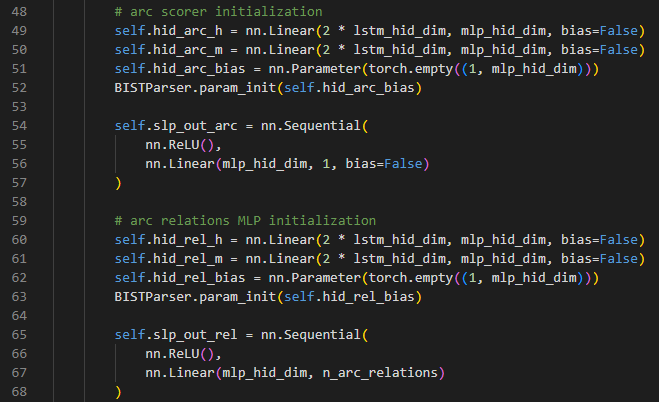

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/B3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python main.py

2023-06-16 17:41:11,848 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': None, 'ext_emb': None, 'seed': 1234, 'epochs': 3, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 2, 'no_cuda': False, 'log_interval': 2000, 'do_eval': False, 'experiment_dir': './results/ds=ptb_epochs=3_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_16_2023'}
2023-06-16 17:41:14,778 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
2023-06-16 17:41:27,528 - INFO - -----------+-----------+-----------+-----------+-----------
2023-06-16 17:41:27,529 - INFO - Train epoch: 1
2023-06-16 17:41:28,030 - INFO - [0/39832 (0%)]
2023-06-16 17:43:14,006 - INFO - [2000/39832 (5%)]
2023-06-16 17:44:59,172 - INFO - [4000/39832 (10%)]
2023-06-16 17:46:41,709 - INFO - [6000/39832 (1

### **3.4: UAS/LAS Analysis with BERT Encoder**

The model achieved an Unlabeled Attachment Score (UAS) of 5.99 and a Labeld Attachment Score (LAS) of 0.00 on the test dataset, both of which are significantly lower than the values obtained in Section 3.1. This indicates that the model performed much worse in accurately predicting unlabeled and labeled dependency relationships between words in the test sentences. The transition-based parser achieved a UAS of 89.22, while the graph-based parser achieved a lower UAS of 5.99. The success of the previous graph-based approaches suggests that the graph-based approach itself is effective for capturing syntactic dependencies. Therefore, the significant drop in performance with the BERT encoder indicates that the issue lies specifically with the integration of the BERT model into the dependency parsing framework. The BERT encoder, with its specific architecture and pretrained representations, might not be well-suited for the task of dependency parsing or may require further fine-tuning and optimization for this particular application.

**Code Modifications:**

`1)` **main.py**: I changed the description of the argparse.ArgumentParser in the main function to indicate that the graph-based dependency parser is now using a BERT feature extractor.

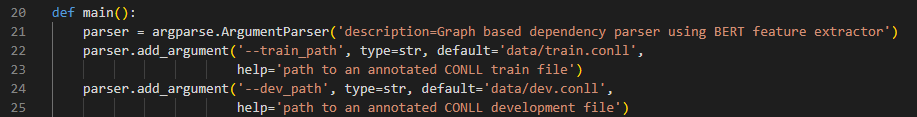

`2)` **model.py**: I imported BertModel and BertTokenizer from the transformers library to use BERT as the pre-trained language model and its corresponding tokenizer in the graph-based dependency parser.

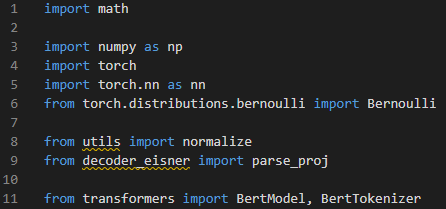

`3)` **model.py**: I created a new boolean variable use_bert and set it to True to indicate that BERT will be used as the feature extractor in the graph-based dependency parser. Additionally, I initialized the BERT model using BertModel.from_pretrained('bert-base-uncased') and the corresponding tokenizer using BertTokenizer.from_pretrained('bert-base-uncased').

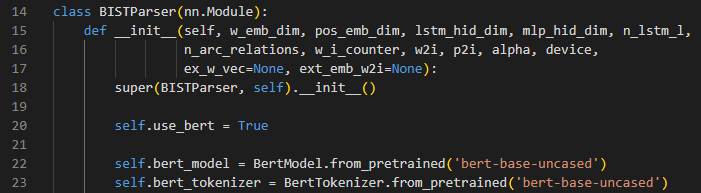

`4)` **model.py**: I modified the structure of the code to accommodate the use of BERT as the feature extractor. To handle both cases - when use_bert is True and when it is False - I introduced a new variable called enc_hid_dim. This variable is designed to cover the hidden dimension of the encoder in both scenarios. I then designed an if-else statement to handle those scenarios. In the case when use_bert is True, I set the enc_hid_dim variable to 768, which represents the hidden dimension of the BERT model. I then assigned the BERT model (self.bert_model) as the encoder and moved it to the specified device. In the case when use_bert is False, I followed the initial structure for the bidirectional LSTM. However, to ensure a consistent structure, I assigned the value of 2 * lstm_hid_dim to enc_hid_dim, to match the hidden dimension of the bidirectional LSTM encoder. This way, the code adapts to the use of BERT or LSTM as the encoder based on the value of use_bert.

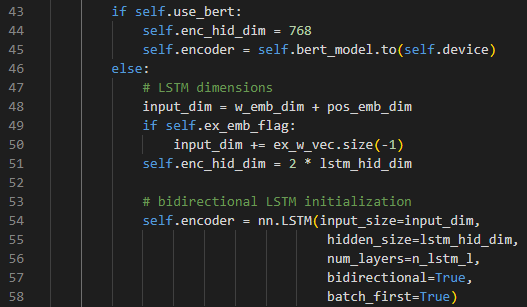

`5)` **model.py**: I utilized the enc_hid_dim variable in the initialization of the arc scorer and arc relations MLP. In both cases, the dimension of the hidden layer was set to enc_hid_dim.

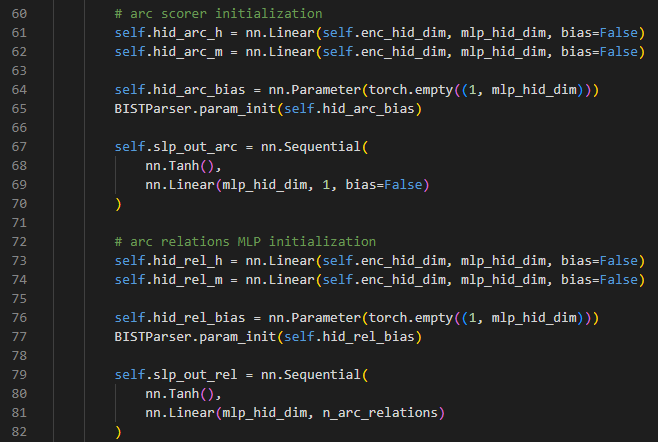

`6)` **model.py**: In the forward method, I incorporated an if-else statement to handle the two cases: when use_bert is True and when it is False. In the case when use_bert is True, I prepared the input data for the BERT encoder. First, I extracted the tokens from the input sentence and converted them to token IDs. Then, I created the input_vectors tensor from the token IDs and moved it to the specified device. Next, I passed input_vectors through the BERT encoder, to obtain the hidden vectors. And finally, I used the last_hidden_state attribute of the BERT output, to retrieve the hidden vectors. In the case when use_bert is False, I followed the initial approach for preparing the input data for the bidirectional LSTM encoder. For both cases, I obtained the hidden_vectors in a different way. In the BERT case, hidden_vectors was obtained from the BERT output (last_hidden_state). In the LSTM case, hidden_vectors was obtained simply by passing input_vectors through the LSTM encoder.

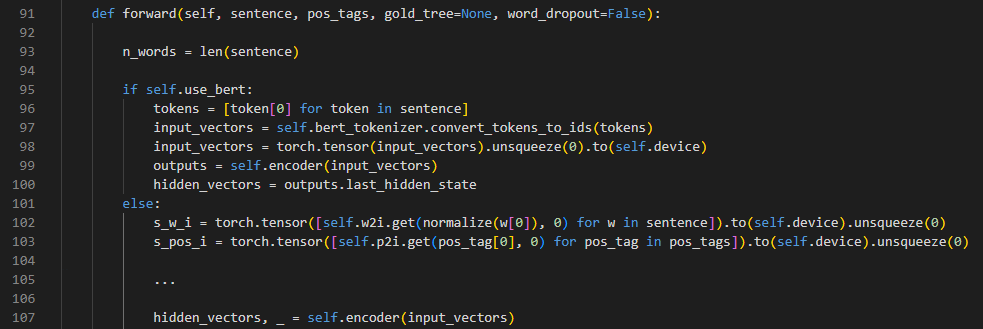

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/nlp/B4')

Mounted at /content/drive


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00


In [4]:
!python main.py

2023-06-17 10:08:43,456 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': None, 'ext_emb': None, 'seed': 1234, 'epochs': 3, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 100, 'mlp_hid_dim': 100, 'n_lstm_layers': 2, 'no_cuda': False, 'log_interval': 2000, 'do_eval': False, 'experiment_dir': './results/ds=ptb_epochs=3_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=100_mlpDim=100_lstmN=2_date=06_17_2023'}
2023-06-17 10:08:45,573 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.

## **4. Transition-based vs Graph-based Dependency Parser**

The transition-based parsers demonstrated a range of Unlabeled Attachment Scores (UAS) between 86.18% and 89.22%, indicating their effectiveness in capturing syntactic relationships between words in a sentence. The graph-based parsers, on the other hand, achieved higher UAS scores ranging from 93.87% to 94.08%. It is important to note that the extremely low UAS scores of 5.99% and 0.00% obtained with the BERT encoder in the graph-based approach were not considered, as they were likely due to issues specific to the BERT model.

When examining the changes made to the transition-based parsers, such as using randomly initialized word embeddings, relying solely on word features, adding an additional hidden layer, and employing a cubic activation function instead of ReLU, it can be observed that these changes resulted in decreased UAS scores. In contrast, for the graph-based parsers, excluding the BERT encoder change, utilizing pre-trained GloVe embeddings and employing the ReLU activation function instead of tanh led to increased UAS scores.

Transition-based and graph-based dependency parsers have their own set of pros and cons. Transition-based parsers are known for their simplicity, efficiency, and fast parsing speed, making them suitable for real-time applications. They require fewer resources and can handle out-of-vocabulary words more effectively. However, they may struggle with capturing long-range dependencies and may lack robustness when faced with complex sentence structures. Graph-based parsers, on the other hand, excel at capturing long-range dependencies and tend to be more accurate in modeling syntactic relationships. They can handle complex sentence structures effectively and offer better performance on tasks that involve semantic analysis. However, they can be computationally expensive, requiring more resources and processing time compared to transition-based parsers.

In summary, transition-based parsers demonstrate a reasonable UAS range but struggle with complex structures, while graph-based parsers consistently achieve higher UAS scores and excel at handling complexity. Modifying the parsers had mixed effects, with transition-based changes decreasing UAS scores and graph-based changes, excluding BERT, increasing UAS scores.